In [1]:
import pandas as pd

In [3]:
#To get the list of samples
f = open("/home/jimitcard/Desktop/OMR/sampled_1250/samples_1250_list.txt", "r")
samples=f.read().strip().split("\n")
print(len(samples))
f.close()

1250


In [ ]:
#to get the vocabulary of samples
vocabulary=set({})
for sample in samples:
    if len(vocabulary)==60:
        break
    f = open("/home/jimitcard/Desktop/OMR/sampled_1250/"+sample+"/"+sample+".semantic", "r")
    notes=f.read().strip().split("\t")
    for note in notes:
        vocabulary.add(note)
print(len(vocabulary))        
    

In [ ]:
vocabulary=list(vocabulary)
vocabulary

In [ ]:
#now create a pandas with samples and vocab and populate for frequency
sample_1250 = pd.DataFrame(index=samples, columns=vocabulary)
sample_1250 = sample_1250.fillna(0) # with 0s rather than NaNs
sample_1250.head()

In [ ]:
for sample in samples:
    f = open("/home/jimitcard/Desktop/OMR/sampled_1250/"+sample+"/"+sample+".semantic", "r")
    notes=f.read().strip().split("\t")
    for note in notes:
        sample_1250.loc[sample,note] +=1
sample_1250.head()
        

In [ ]:
frequency_of_notes=sample_1250.sum(numeric_only=True, axis = 0, skipna = True) 
sorted_frequency=frequency_of_notes.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
sorted_frequency

In [11]:
sorted_frequency.describe()

count      60.000000
mean      518.750000
std       640.590131
min        59.000000
25%       131.750000
50%       283.500000
75%       685.250000
max      4028.000000
dtype: float64

# Bar Graph

In [ ]:
#plotting bar graph with bins of different colors
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [13]:
counts=[]
for frequency in sorted_frequency:
    counts.append(frequency)

In [ ]:
counts

In [31]:
bins_label=[]
for i in range(0,6):
    bins_label.append('HF Samples')
for i in range(6,54):
    bins_label.append('Normal Samples')
for i in range(54,60):
    bins_label.append('LF Samples')


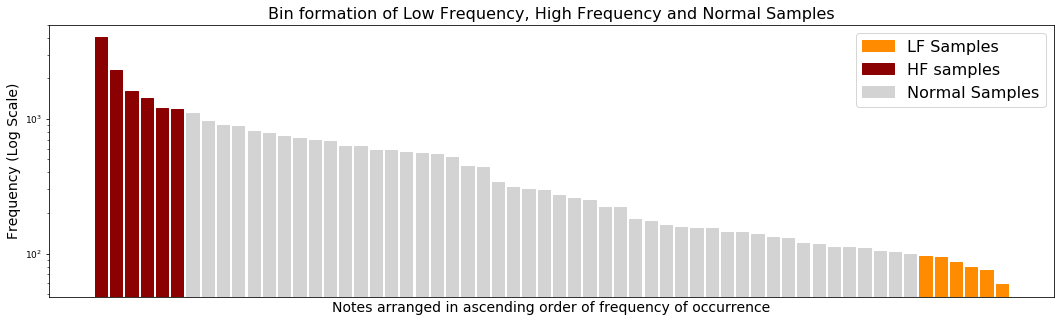

In [51]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)

barlist=plt.bar(sorted_frequency.index,counts)
plt.xticks([])

for i in range(0,6):
    barlist[i].set_color('darkred')
for i in range(6,54):
    barlist[i].set_color('lightgray')
for i in range(54,60):
    barlist[i].set_color('darkorange')
plt.yscale('log')
colors = {'HF samples':'darkred', 'Normal Samples':'lightgray','LF Samples':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),10,10, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('Frequency (Log Scale)')
plt.xlabel('Notes arranged in ascending order of frequency of occurrence')
plt.title('Bin formation of Low Frequency, High Frequency and Normal Samples')
plt.savefig('barGraph.png')

plt.show()

In [49]:
SMALL_SIZE = 16
MEDIUM_SIZE = 9
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Frequency of notes

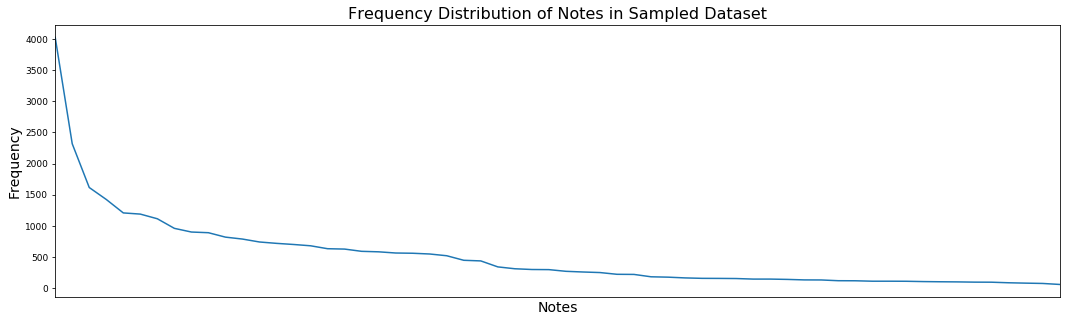

In [151]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
sorted_frequency.plot(kind='line')

plt.title('Frequency Distribution of Notes in Sampled Dataset')
plt.ylabel('Frequency')
plt.xlabel('Notes')
plt.xticks([])

plt.savefig('frequencyVsNotes.png')
#plt.plot([5,0], [5,4500], 'k-')
#plt.yscale('log')
#median
#10-90
plt.show()

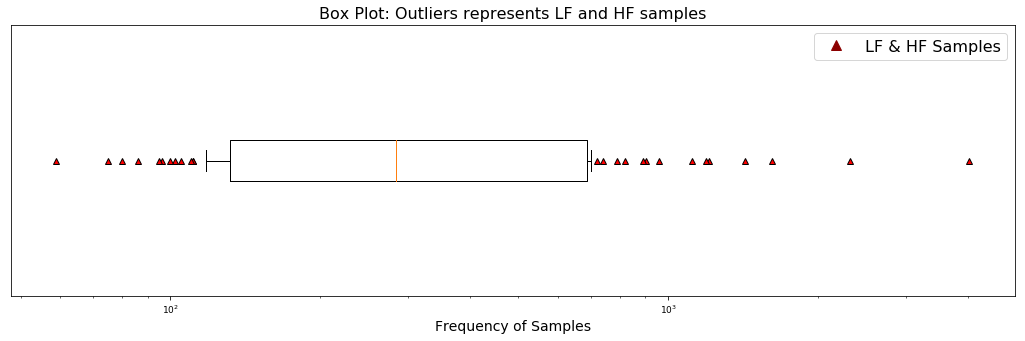

In [154]:
import matplotlib.lines as mlines

red_square = dict(markerfacecolor='r', marker='^')
fig6, ax6 = plt.subplots(figsize=(18,5))
ax6.set_title('Box Plot: Outliers represents LF and HF samples')
ax6.boxplot(sorted_frequency, flierprops=red_square, vert=False, whis=0.03)
plt.yticks([])
plt.xscale('log')
plt.xlabel('Frequency of Samples')

#plt.xlabel('Frequency of Symbol')
red_triangle = mlines.Line2D([], [], color='darkred', marker='^', linestyle='None',markersize=10, label='LF & HF Samples')
plt.legend(handles=[red_triangle])
plt.savefig('boxPlot.png')


#exponential scale?
#editing

# Waffle Chart

<Figure size 432x288 with 0 Axes>

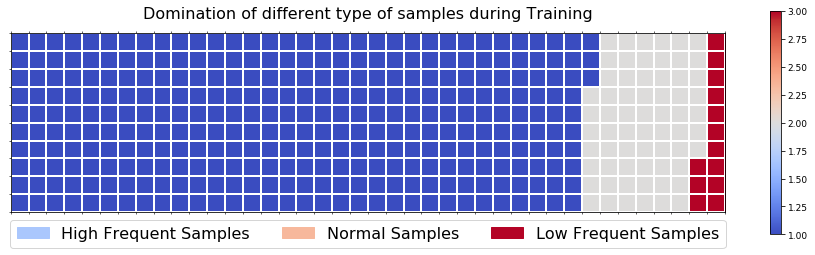

In [150]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'catagories': ['High Frequent Samples', 'Normal Samples', 'Low Frequent Samples'], 
                    'values': [323, 64, 13] })
# Now, we define a desired height and width.
waffle_plot_width = 40
waffle_plot_height =10

classes = df['catagories']
values = df['values']

def waffle_plot(classes, values, height, width, colormap):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each catagories.
    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    # Make a dummy matrix for use in plotting.
    plot_matrix = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    class_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(waffle_plot_width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this class...
            if tile_index > sum(tiles_per_class[0:class_index]):

                # ...increment to the next class.
                class_index += 1       

            # Set the class value to an integer, which increases with class.
            plot_matrix[row, col] = class_index

    # Create a new figure.
    fig = plt.figure()

    # Using matshow solves your "non-square" problem. 
    plt.matshow(plot_matrix, cmap=colormap)
    plt.colorbar()

    # Get the axis.
    ax = plt.gca()

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    for i, c in enumerate(classes):
        lable_str = c
        color_val = colormap(float(i+1)/len(classes))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    # Add the legend. Still a bit of work to do here, to perfect centering.
    plt.legend(handles=legend_handles, loc=1, ncol=len(classes),
               bbox_to_anchor=(0.062, -0.1, 0.95, .10))

    plt.xticks([])
    plt.yticks([])
    plt.title('Domination of different type of samples during Training')

# Call the plotting function.
waffle_plot(classes, values, waffle_plot_height, waffle_plot_width,
            plt.cm.coolwarm)
plt.savefig('waffleChart.png')

# Word Cloud

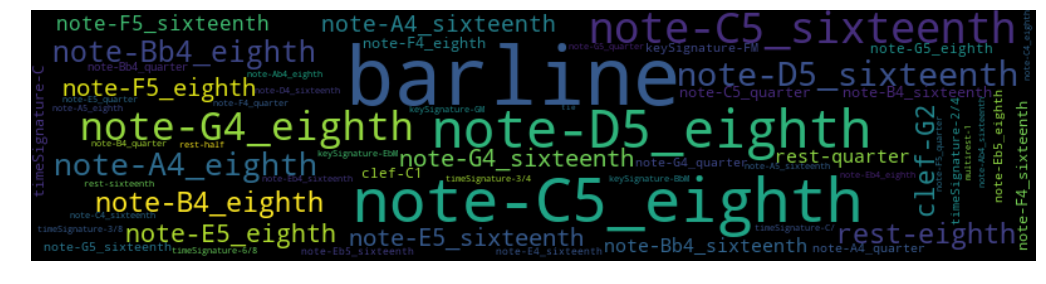

In [122]:
wordCloud = pd.DataFrame({'word':sorted_frequency.index ,
                   'count': counts}) 
data = dict(zip(wordCloud['word'].tolist(), wordCloud['count'].tolist()))
from wordcloud import WordCloud

wc = WordCloud(width=800, height=200, max_words=200,background_color='black').generate_from_frequencies(data)
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
#plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordCloud.png')
plt.show()